# Part 1: Training and Testing

## Load Data

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"

df = pd.read_csv(url, header=0)

df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## drop Unnamed: 0.1	Unnamed: 0

In [6]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


## Function for plotting

In [29]:
def DistributionPlot(RedFuntion, BlueFunction, RedName, Bluename, Title):
    plt.figure(figsize=(12,10))
    ax1 = sns.kdeplot(RedFuntion, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=Bluename, ax=ax1)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")
    plt.legend()
    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
Y = df['price']
X = df.drop(['price'], axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.10, ran6dom_state=42)

print(f"Number of Training samples : {xTrain.shape[0]}")
print(f"Number of Training samples : {xTest.shape[0]}")

Number of Training samples : 180
Number of Training samples : 21


In [14]:
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(X, Y, test_size=0.40, random_state=0)

## train a linear model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lre = LinearRegression()

lre.fit(xTrain[['horsepower']], yTrain)

yTrainPred = lre.predict(xTrain[['horsepower']])
yTestPred = lre.predict(xTest[['horsepower']])

r2Train = r2_score(yTrain, yTrainPred)
r2Test = r2_score(yTest, yTestPred)

MSETrain = mean_squared_error(yTrain, yTrainPred)
MSETest = mean_squared_error(yTest, yTestPred)

print(f"r2 Score of Training : {r2Train}")
print(f"r2 Score of Test : {r2Test}")

print(f"MSE of Training : {MSETrain}")
print(f"MSE of Test : {MSETest}")

r2 Score of Training : 0.6385840105530061
r2 Score of Test : 0.6572835188314445
MSE of Training : 18889311.60457418
MSE of Test : 48287476.288835526


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lre = LinearRegression()

lre.fit(xTrain1[['horsepower']], yTrain1)

yTrainPred = lre.predict(xTrain1[['horsepower']])
yTestPred = lre.predict(xTest1[['horsepower']])

r2Train = r2_score(yTrain1, yTrainPred)
r2Test = r2_score(yTest1, yTestPred)

MSETrain = mean_squared_error(yTrain1, yTrainPred)
MSETest = mean_squared_error(yTest1, yTestPred)

print(f"r2 Score of Training : {r2Train}")
print(f"r2 Score of Test : {r2Test}")

print(f"MSE of Training : {MSETrain}")
print(f"MSE of Test : {MSETest}")

r2 Score of Training : 0.5754067463583004
r2 Score of Test : 0.7139364665406973
MSE of Training : 22993373.412854075
MSE of Test : 21581996.712964956


## Cross-validation


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lre = LinearRegression()
Rcross = cross_val_score(lre, X[['horsepower']],Y, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [20]:
print(f"Mean of Rcross : {Rcross.mean()}, std of Rcross : {Rcross.std()}")

Mean of Rcross : 0.522009915042119, std of Rcross : 0.2911839444756029


In [23]:
MSECross = cross_val_score(lre, X[['horsepower']], Y, cv=4, scoring='neg_mean_squared_error')
MSECross

array([-20254142.84026702, -43745493.2650517 , -12539630.34014931,
       -17561927.7224759 ])

In [25]:
Rcross = cross_val_score(lre, X[['horsepower']], Y, cv=2)

print(f"The r2 score of second fold : {Rcross.mean()}")

The r2 score of second fold : 0.5166761697127429


# Part 2: Overfitting, Underfitting and Model Selection

In [27]:
lr = LinearRegression()
lr.fit(xTrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], yTrain)

yhat_train = lr.predict(xTrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lr.predict(xTest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

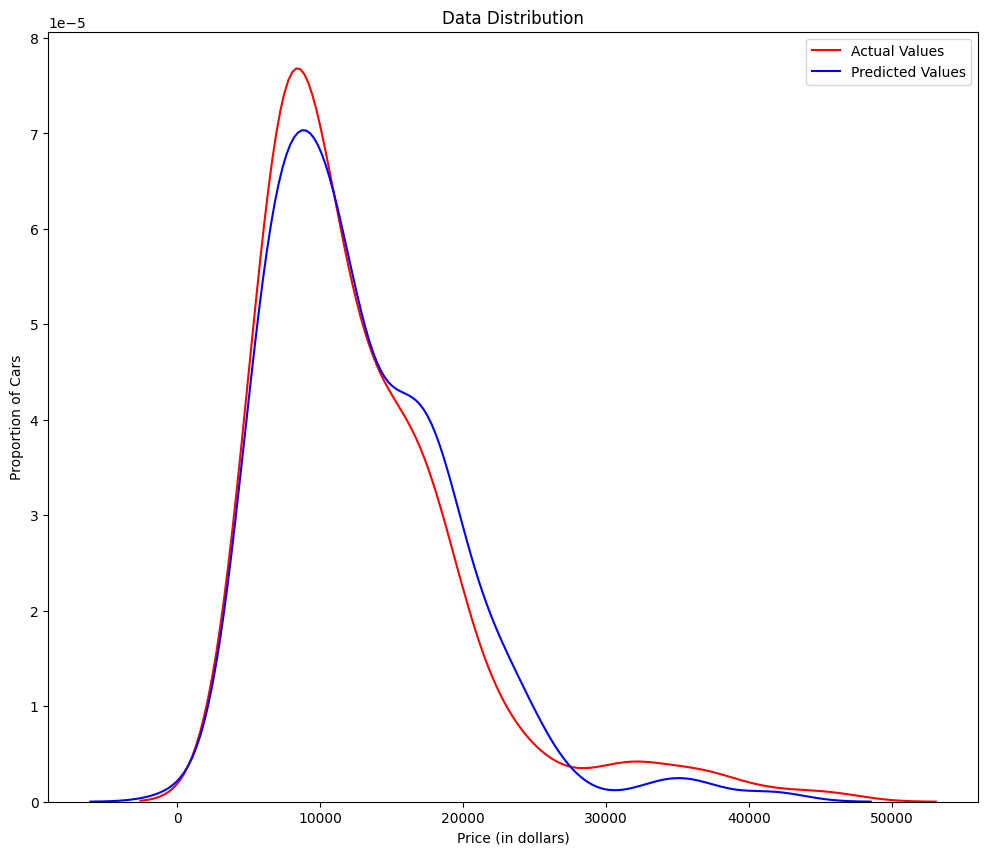

In [30]:
Title = "Data Distribution"
DistributionPlot(yTrain, yhat_train, "Actual Values", "Predicted Values", Title)

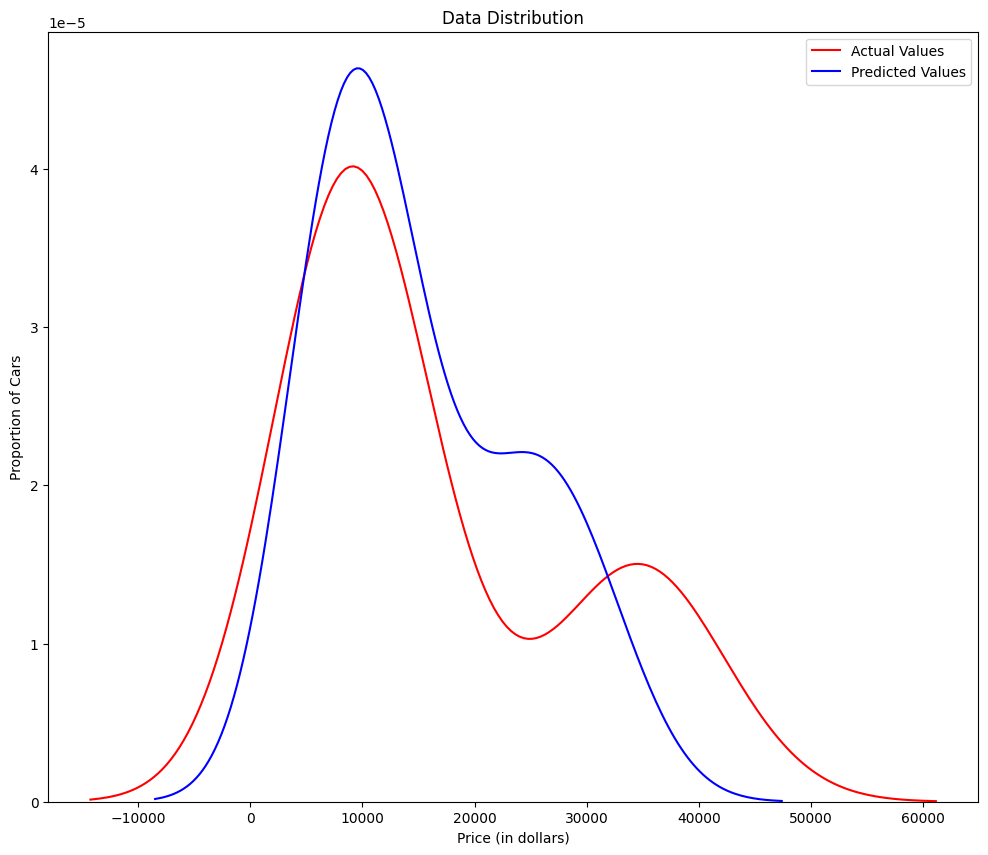

In [31]:
Title = "Data Distribution"
DistributionPlot(yTest, yhat_test, "Actual Values", "Predicted Values", Title)

## polynominal features

Shape of xTrain : (110, 6)
Shape of xTest : (91, 6)


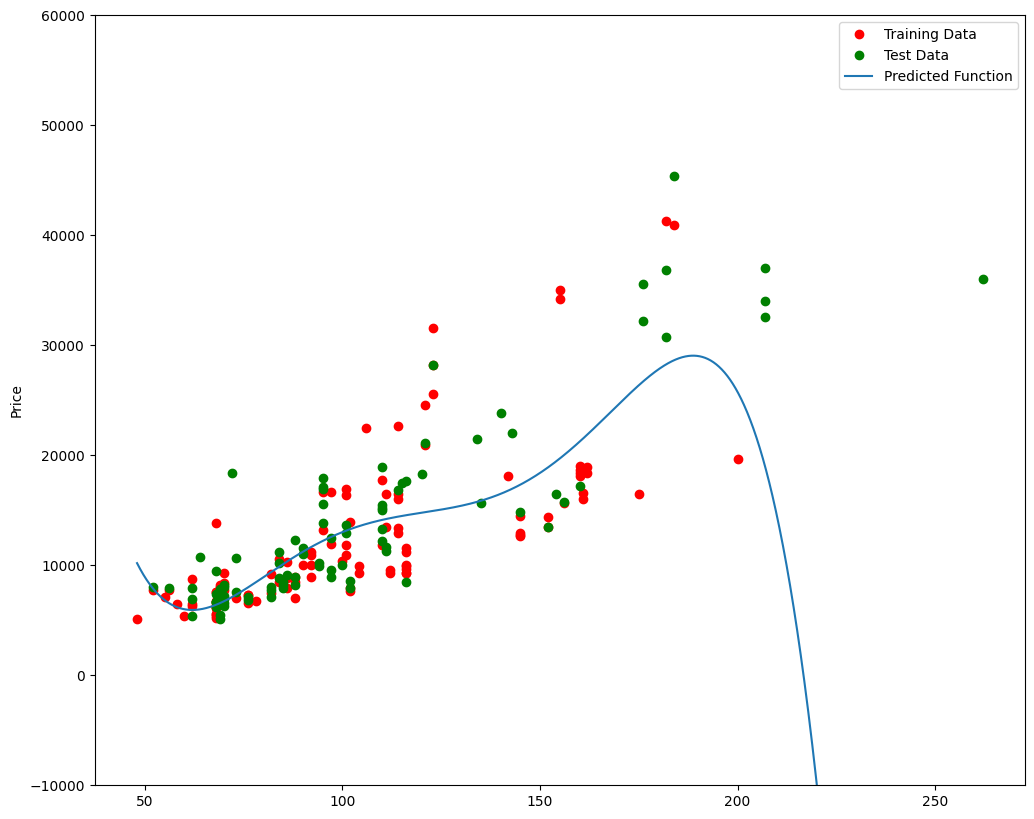

In [38]:
from sklearn.preprocessing import PolynomialFeatures

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)

xTrainPr = pr.fit_transform(xTrain[['horsepower']])
xTestPr = pr.fit_transform(xTest[['horsepower']])

print(f"Shape of xTrain : {xTrainPr.shape}")
print(f"Shape of xTest : {xTestPr.shape}")

poly = LinearRegression()
poly.fit(xTrainPr, yTrain)
yPredTest = poly.predict(xTestPr)


PollyPlot(xTrain['horsepower'], xTest['horsepower'], yTrain, yTest, poly, pr)